In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas_profiling
import pandas as pd
import seaborn as sns
from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
%matplotlib inline
from skimage.io import imread
from skimage.transform import resize

In [2]:
# load image in structure directory like it's sklearn sample dataset
def load_image_files(container_path,dimension=(64,64)):

    image_dir=Path(container_path)
    folders=[directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories=[fo.name for fo in folders]
    print(categories)
    descr = """description: image classification """

    images=[]
    flat_data=[]
    target=[]
    #print(target)

    for i, direc in enumerate(folders):
        for file in direc.iterdir():
            img=imread(file)
            #plt.imshow(img)#original images we have to converting image
            #plt.show()
            img_resized=resize(img,dimension,anti_aliasing=True,mode='reflect')
            plt.imshow(img_resized)#after converting the image
            #plt.show()
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data=np.array(flat_data)
    target=np.array(target)
    images=np.array(images)
        
    return Bunch(data=flat_data,
                    target=target,
                    target_names=categories,
                    images=images,
                    DESCR=descr)

['vechiles', 'cricket', 'flowers', 'fruits', 'smile', 'angry', 'sad', 'heros']


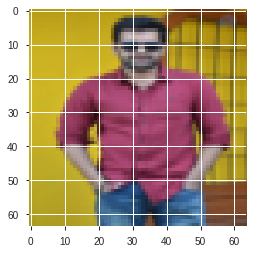

In [4]:
from pathlib import Path
from sklearn.utils import Bunch
import skimage
#from PIL import Image
image_dataset=load_image_files("/home/manikanta/Documents/ML/classification/KNN/Image_dataset/")

In [5]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [6]:
image_dataset.data

array([[0.56816789, 0.55785463, 0.27305836, ..., 0.16636029, 0.20165441,
        0.24136029],
       [0.15686275, 0.1807598 , 0.06666667, ..., 0.44705882, 0.45490196,
        0.45098039],
       [0.99607843, 0.99607843, 0.99607843, ..., 0.99607843, 0.99607843,
        0.99607843],
       ...,
       [0.31372549, 0.33333333, 0.25490196, ..., 0.19779412, 0.23529412,
        0.14117647],
       [0.83492647, 0.8310049 , 0.74865196, ..., 0.84309896, 0.87054994,
        0.80780484],
       [0.70980392, 0.60784314, 0.07647059, ..., 0.37058824, 0.24603248,
        0.19607843]])

In [7]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7])

In [8]:
df=pd.DataFrame(image_dataset.data)

In [9]:
df

,0,1,2,3,4,5,6,7,8,9,...,12278,12279,12280,12281,12282,12283,12284,12285,12286,12287
0,0.568168,0.557855,0.273058,0.547239,0.540200,0.271906,0.506036,0.495247,0.277114,0.486439,...,0.304596,0.165686,0.236769,0.279906,0.104255,0.161945,0.214553,0.166360,0.201654,0.241360
1,0.156863,0.180760,0.066667,0.184314,0.227819,0.054902,0.200000,0.247059,0.063113,0.208211,...,0.474142,0.439216,0.439216,0.438848,0.435294,0.443137,0.439216,0.447059,0.454902,0.450980
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078
3,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,...,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,0.854902,0.745098,0.741176,0.850980,0.741176,0.733333,0.831373,0.712868,0.693260,0.815686,...,0.521936,0.406985,0.383456,0.583456,0.480270,0.443137,0.631373,0.383088,0.339951,0.456373
251,0.062745,0.066667,0.074510,0.066667,0.070588,0.075643,0.061485,0.074510,0.086275,0.062745,...,0.105092,0.093321,0.089400,0.090196,0.117647,0.097243,0.097243,0.091881,0.083696,0.081899
252,0.313725,0.333333,0.254902,0.309804,0.333333,0.247059,0.300245,0.337745,0.231373,0.274755,...,0.431373,0.907353,0.760784,0.435294,0.404902,0.397549,0.232843,0.197794,0.235294,0.141176
253,0.834926,0.831005,0.748652,0.843260,0.839338,0.756985,0.850368,0.846446,0.764093,0.854557,...,0.786520,0.835294,0.857598,0.798162,0.839216,0.866552,0.803807,0.843099,0.870550,0.807805


In [10]:
df['target']=image_dataset.target

In [11]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12279,12280,12281,12282,12283,12284,12285,12286,12287,target
0,0.568168,0.557855,0.273058,0.547239,0.540200,0.271906,0.506036,0.495247,0.277114,0.486439,...,0.165686,0.236769,0.279906,0.104255,0.161945,0.214553,0.166360,0.201654,0.241360,0
1,0.156863,0.180760,0.066667,0.184314,0.227819,0.054902,0.200000,0.247059,0.063113,0.208211,...,0.439216,0.439216,0.438848,0.435294,0.443137,0.439216,0.447059,0.454902,0.450980,0
2,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0
3,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,...,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0.998529,0
4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0


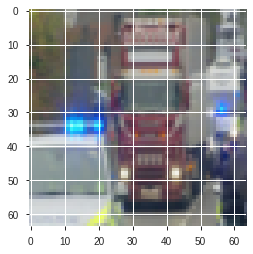

In [12]:
plt.imshow(image_dataset.images[0])

In [13]:
image_dataset.images[0].shape

(64, 64, 3)

In [14]:
image_dataset.data.shape

(255, 12288)

In [16]:
#n_componet=0.80 it will return the eigen vectors that have 80% variance in the datasetf
mul_img_pca=PCA(n_components=0.8)

In [17]:
mul_img_pca.fit(image_dataset.data)

PCA(copy=True, iterated_power='auto', n_components=0.8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [18]:
mul_img_pca.components_.shape

(29, 12288)

In [19]:
componets=mul_img_pca.transform(image_dataset.data)
componets.shape

(255, 29)

In [20]:
componets

array([[  5.71707236,  -6.35157055,  -0.34088569, ...,  -1.82476156,
          1.90637029,   2.3275583 ],
       [  9.94882931,  -1.24949876,   3.48817165, ...,  -1.10436822,
         -1.14882616,   1.23692665],
       [-24.73349656,   4.78013018,  13.47334964, ...,   2.64822892,
         -1.09360193,   5.69311729],
       ...,
       [ 18.73564255,   1.78234464,  -8.688191  , ...,  -2.05122296,
          1.03787873,   1.80276629],
       [-22.17780453, -10.77174421,   8.83438156, ...,   1.90884293,
          3.11502964,  -0.37637608],
       [  9.03418194,   4.60470996,  -1.43402899, ...,   0.44315405,
          1.96098505,  -2.89959109]])

In [21]:
projection=mul_img_pca.inverse_transform(componets)
projection.shape

(255, 12288)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

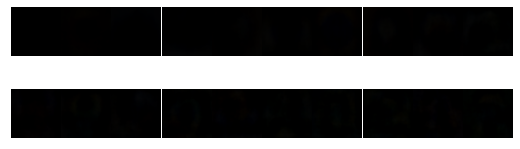

In [24]:
fig,axes=plt.subplots(2,10,
                     figsize=(9,3),subplot_kw={'xticks':[],'yticks':[]},
                    gridspec_kw=dict(hspace=0.01,wspace=0.01))
for i,ax in enumerate(axes.flat):
    ax.imshow(mul_img_pca.components_[i].reshape(64,64,3))